In [6]:
import os
import tarfile

TAR_FILE = "D:/brain_tumor_project/data/BraTS2021_Training_Data.tar"  
EXTRACT_PATH = "D:/brain_tumor_project/training_data"

if not os.path.exists(TAR_FILE):
    print(f"Error: File not found at {os.path.abspath(TAR_FILE)}")
    raise FileNotFoundError(f"Please verify the file path: {TAR_FILE}")
os.makedirs(EXTRACT_PATH, exist_ok=True)

try:
    with tarfile.open(TAR_FILE, 'r') as tar:
        tar.extractall(EXTRACT_PATH)
    print(f"Successfully extracted to {EXTRACT_PATH}")
except tarfile.TarError as e:
    print(f"Error extracting tar file: {e}")

C:\Users\Admin\AppData\Local\Temp\ipykernel_17336\4196367237.py:19: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(EXTRACT_PATH)


Successfully extracted to D:/brain_tumor_project/training_data


In [7]:
import os
import tarfile

TAR_FILE = "D:/brain_tumor_project/data/BraTS2021_00495.tar"  
EXTRACT_PATH = "D:/brain_tumor_project/t1"

if not os.path.exists(TAR_FILE):
    print(f"Error: File not found at {os.path.abspath(TAR_FILE)}")
    raise FileNotFoundError(f"Please verify the file path: {TAR_FILE}")
os.makedirs(EXTRACT_PATH, exist_ok=True)

try:
    with tarfile.open(TAR_FILE, 'r') as tar:
        tar.extractall(EXTRACT_PATH)
    print(f"Successfully extracted to {EXTRACT_PATH}")
except tarfile.TarError as e:
    print(f"Error extracting tar file: {e}")

Successfully extracted to D:/brain_tumor_project/t1


C:\Users\Admin\AppData\Local\Temp\ipykernel_17336\3984780004.py:14: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(EXTRACT_PATH)


In [8]:
import os
import tarfile

TAR_FILE = "D:/brain_tumor_project/data/BraTS2021_00621.tar"  
EXTRACT_PATH = "D:/brain_tumor_project/t2"

if not os.path.exists(TAR_FILE):
    print(f"Error: File not found at {os.path.abspath(TAR_FILE)}")
    raise FileNotFoundError(f"Please verify the file path: {TAR_FILE}")
os.makedirs(EXTRACT_PATH, exist_ok=True)

try:
    with tarfile.open(TAR_FILE, 'r') as tar:
        tar.extractall(EXTRACT_PATH)
    print(f"Successfully extracted to {EXTRACT_PATH}")
except tarfile.TarError as e:
    print(f"Error extracting tar file: {e}")

Successfully extracted to D:/brain_tumor_project/t2


C:\Users\Admin\AppData\Local\Temp\ipykernel_17336\3477083401.py:14: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(EXTRACT_PATH)


In [9]:
pip install nibabel matplotlib numpy

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 751.5 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/8.1 MB 812.6 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/8.1 MB 805.3 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/8.1 MB 805.3 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.1 MB 760.8 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.1 MB 760.8 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.1 MB 730.7 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.1 MB 730.7 kB/s eta 0:00:09
   --------- ------------------------------ 1.8/8.1 MB 735.1 kB/s eta 0:00:09
   --------- ---------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


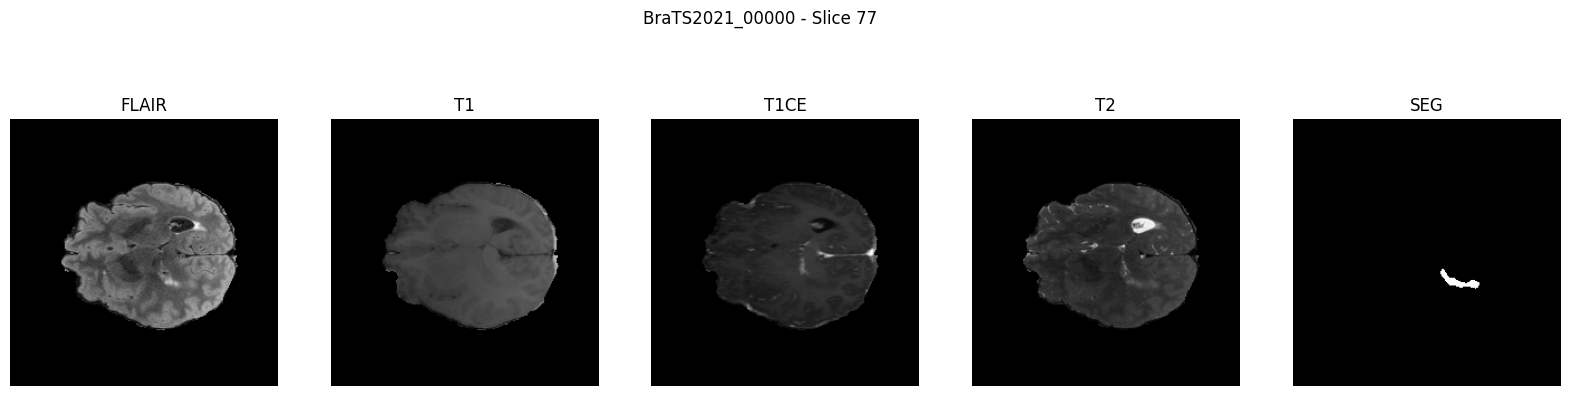

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

subject_dir = "D:/brain_tumor_project/training_data/BraTS2021_00005/"
modalities = {
    "FLAIR": f"{subject_dir}BraTS2021_00005_flair.nii.gz",
    "T1": f"{subject_dir}BraTS2021_00005_t1.nii.gz",
    "T1CE": f"{subject_dir}BraTS2021_00005_t1ce.nii.gz",
    "T2": f"{subject_dir}BraTS2021_00005_t2.nii.gz",
    "SEG": f"{subject_dir}BraTS2021_00005_seg.nii.gz",
}

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
slice_idx = 77 

for ax, (modality, path) in zip(axes, modalities.items()):
 
    img = nib.load(path)
    data = img.get_fdata()
    
    slice_data = data[:, :, slice_idx]
    
    ax.imshow(slice_data, cmap="gray")
    ax.set_title(modality)
    ax.axis("off")

plt.suptitle(f"BraTS2021_00000 - Slice {slice_idx}")
plt.show()

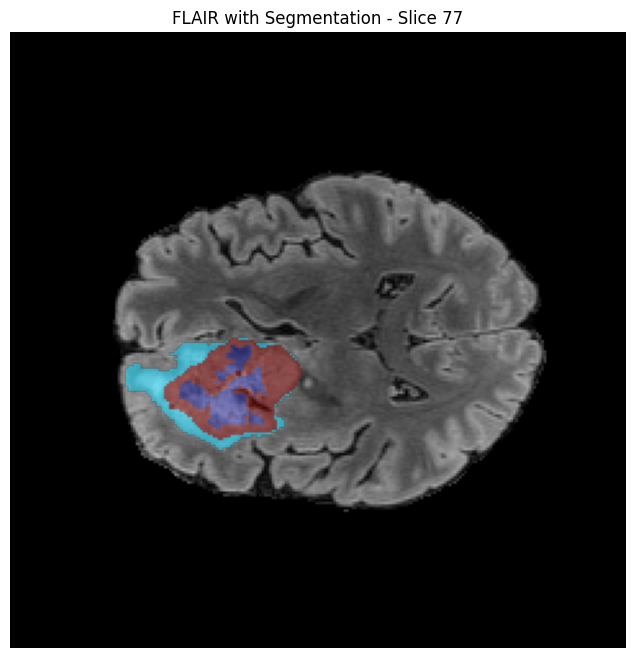

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

subject_dir = "D:/brain_tumor_project/training_data/BraTS2021_00000/"
flair_path = f"{subject_dir}BraTS2021_00000_flair.nii.gz"
seg_path = f"{subject_dir}BraTS2021_00000_seg.nii.gz"

flair_img = nib.load(flair_path)
seg_img = nib.load(seg_path)
flair_data = flair_img.get_fdata()
seg_data = seg_img.get_fdata()

slice_idx = flair_data.shape[2] // 2
flair_slice = flair_data[:, :, slice_idx]
seg_slice = seg_data[:, :, slice_idx]

plt.figure(figsize=(8, 8))
plt.imshow(flair_slice, cmap="gray")
plt.imshow(np.ma.masked_where(seg_slice == 0, seg_slice), cmap="jet", alpha=0.5)  
plt.title(f"FLAIR with Segmentation - Slice {slice_idx}")
plt.axis("off")
plt.show()

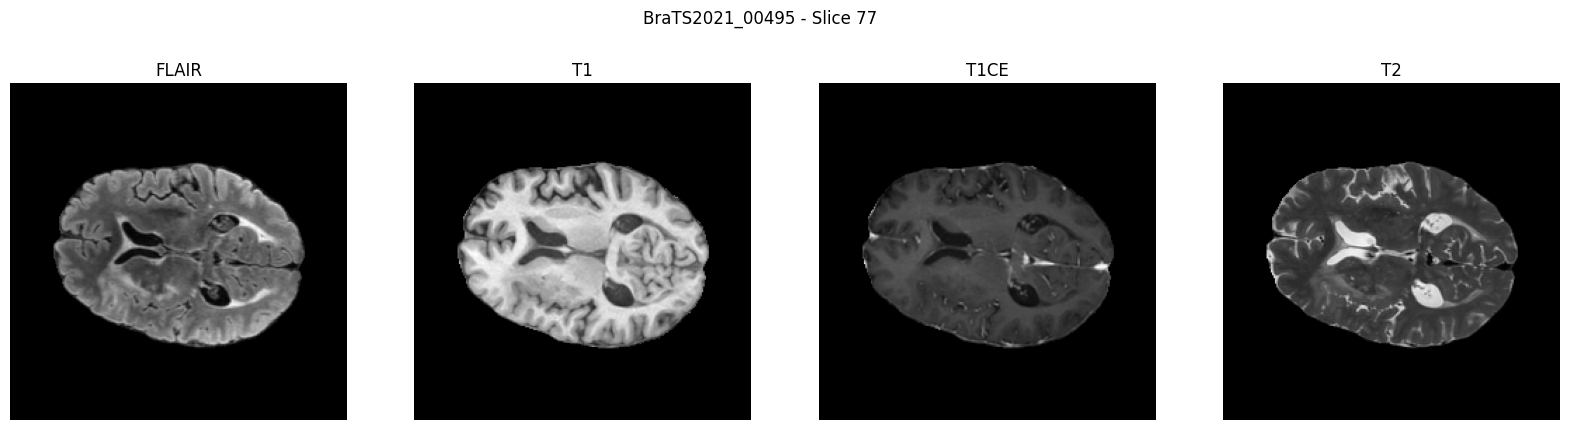

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

subject_dir = "D:/brain_tumor_project/t2/"
modalities = {
    "FLAIR": f"{subject_dir}BraTS2021_00621_flair.nii.gz",
    "T1": f"{subject_dir}BraTS2021_00621_t1.nii.gz",
    "T1CE": f"{subject_dir}BraTS2021_00621_t1ce.nii.gz",
    "T2": f"{subject_dir}BraTS2021_00621_t2.nii.gz",
    "SEG": f"{base_path}BraTS2021_00621_seg.nii.gz",
}

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
slice_idx = 77  

for ax, (modality, path) in zip(axes, modalities.items()):
 
    img = nib.load(path)
    data = img.get_fdata()
    
    slice_data = data[:, :, slice_idx]
    
    ax.imshow(slice_data, cmap="gray")
    ax.set_title(modality)
    ax.axis("off")

plt.suptitle(f"BraTS2021_00495 - Slice {slice_idx}")
plt.show()

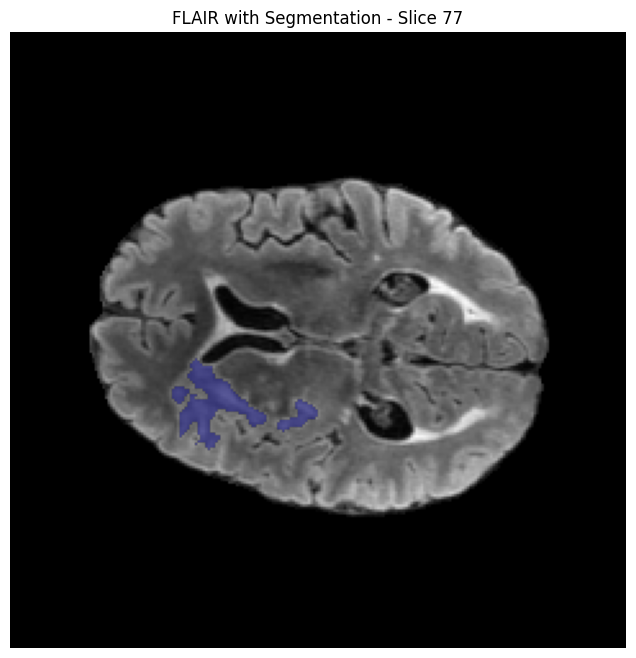

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

subject_dir = "D:/brain_tumor_project/t2/"
flair_path = f"{subject_dir}BraTS2021_00621_flair.nii.gz"
seg_path = f"{subject_dir}BraTS2021_00621_seg.nii.gz"

flair_img = nib.load(flair_path)
seg_img = nib.load(seg_path)
flair_data = flair_img.get_fdata()
seg_data = seg_img.get_fdata()

slice_idx = flair_data.shape[2] // 2
flair_slice = flair_data[:, :, slice_idx]
seg_slice = seg_data[:, :, slice_idx]

plt.figure(figsize=(8, 8))
plt.imshow(flair_slice, cmap="gray")
plt.imshow(np.ma.masked_where(seg_slice == 0, seg_slice), cmap="jet", alpha=0.5)  
plt.title(f"FLAIR with Segmentation - Slice {slice_idx}")
plt.axis("off")
plt.show()